# Load libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Constants

In [2]:
dataset = ('CAMELS_spat_NH', 'camels_spat')
country ="USA"    #"CAN"
BASIN_ID = '01013500'   # '01022500' '01030500' '06431500'
data_dir = f"../../../../../gladwell/hydrology/SUMMA/summa-ml-models/{dataset[0]}/CAMELS_spat_{country}"

# 'countries' to string and lowercase
countries_str = '-'.join(country).lower()


# StartDate = "1975-10-01"
# EndDate = "2019-09-30"
StartDate = "1980-10-01"
EndDate = "2008-09-30"
# StartDate = "1980-10-01"
# EndDate = "2010-09-30"

pairs_dict = {
    'precipitation': ['prcp', 'mtpr'],
    'temperature': ['tmean', 't'],
    'shortwave_rad': ['msdwswrf', 'msnswrf'],
    # 'longwave_rad':  ['msdwlwrf', 'msnlwrf'],
    'preassure': ['e', 'sp'],
}

# Load Data

In [3]:
file_name = f'{country}_{BASIN_ID}.csv'
df = pd.read_csv(os.path.join(data_dir, file_name))
df['sp'] = df['sp'] / 1000
df

,date,e,mper,msdwlwrf,msdwswrf,msnlwrf,msnswrf,mtpr,q,rh,sp,t,u,v,w,phi,tmean,prcp,q_obs
0,1950-01-01,0.270304,-2.618595e-06,217.18544,72.323460,-56.623028,47.709766,0.000119,0.001694,0.807076,99.470914,266.06372,1.081825,-0.177909,1.462897,276.25122,265.55070,0.000072,28.260213
1,1950-01-02,0.342777,-3.460444e-06,249.00653,53.459774,-35.560530,35.247402,0.000049,0.002157,0.886699,99.164850,267.16970,0.202422,1.813112,1.887755,185.13155,267.10600,0.000302,25.909915
2,1950-01-03,0.674999,2.028723e-06,319.39807,10.629246,-1.838591,6.997986,0.002098,0.004300,0.977293,98.094040,274.73615,-0.735014,2.275320,2.478098,161.64493,274.50143,0.001502,26.108133
3,1950-01-04,0.945572,7.564219e-06,345.41640,12.827576,4.537719,8.668845,0.001129,0.006095,0.977940,96.999500,279.52197,0.854513,2.244870,2.514553,199.47552,280.01170,0.000319,28.033678
4,1950-01-05,0.408154,-2.799970e-06,249.17100,53.726380,-48.842022,37.909240,0.000091,0.002601,0.782132,98.538380,269.31250,1.338172,-1.655457,2.894249,216.18230,270.46762,0.000021,30.582194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25562,2019-12-27,0.331939,-1.034492e-06,276.51706,11.667289,-3.559674,7.609951,0.001371,0.002117,0.890390,98.150060,265.94925,0.585690,1.072699,1.904357,194.31862,265.34933,0.001099,44.457449
25563,2019-12-28,0.442453,-3.034541e-06,250.18282,49.461468,-57.065388,32.614730,0.000031,0.002826,0.776570,97.707970,272.36390,3.005510,-0.966411,3.185892,287.73233,271.63400,0.000023,42.758438
25564,2019-12-29,0.314476,-2.718553e-06,243.12830,44.435780,-45.398945,29.193472,0.000032,0.001993,0.802957,98.428090,267.84467,1.608992,-1.794764,2.450594,318.70215,269.18906,0.000046,41.059428
25565,2019-12-30,0.239555,-3.410649e-06,209.40149,69.066910,-58.961212,45.630627,0.000009,0.001512,0.888607,98.771870,263.49683,-1.190619,-0.710885,2.079723,144.49135,264.47256,0.000014,39.643585


# Run

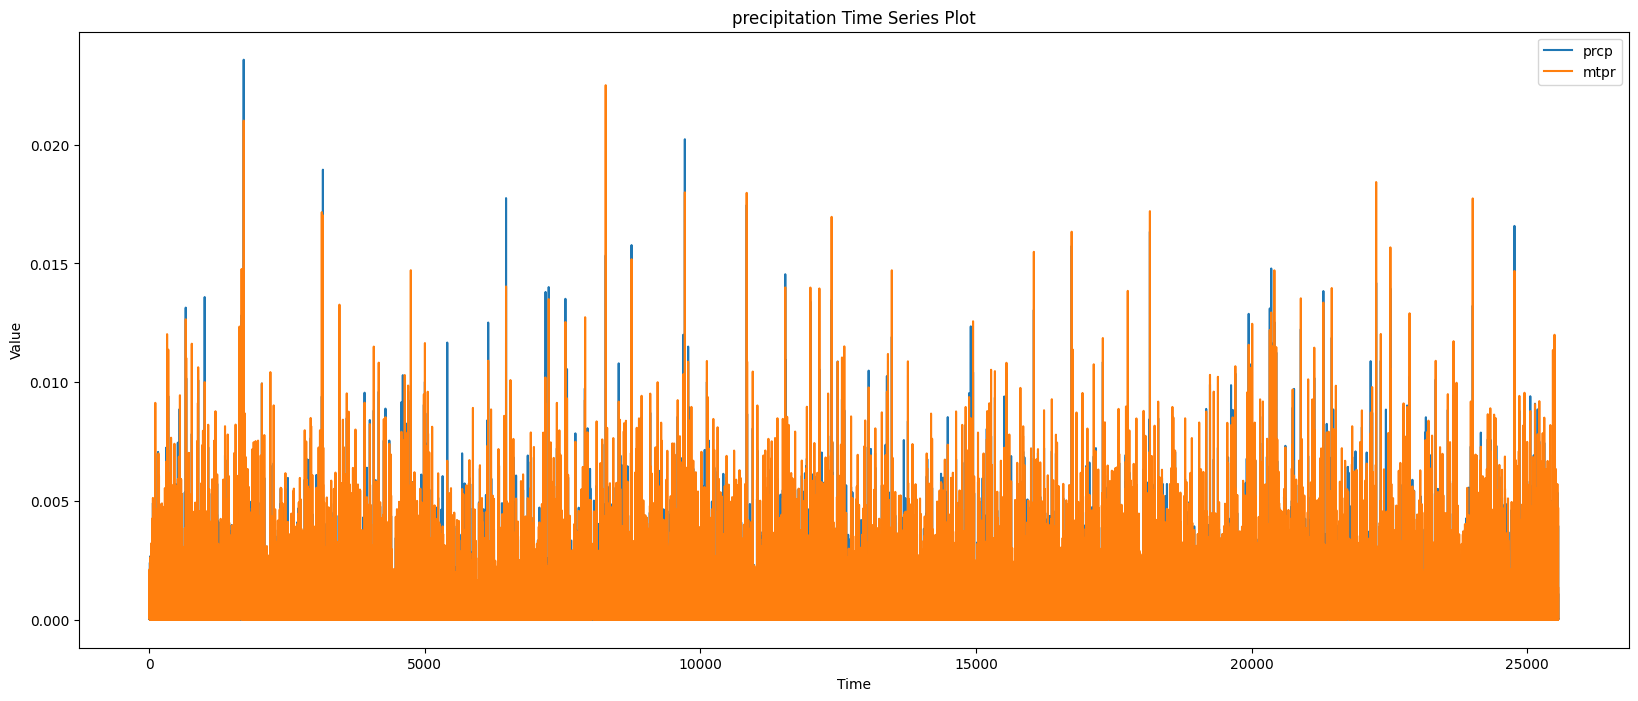

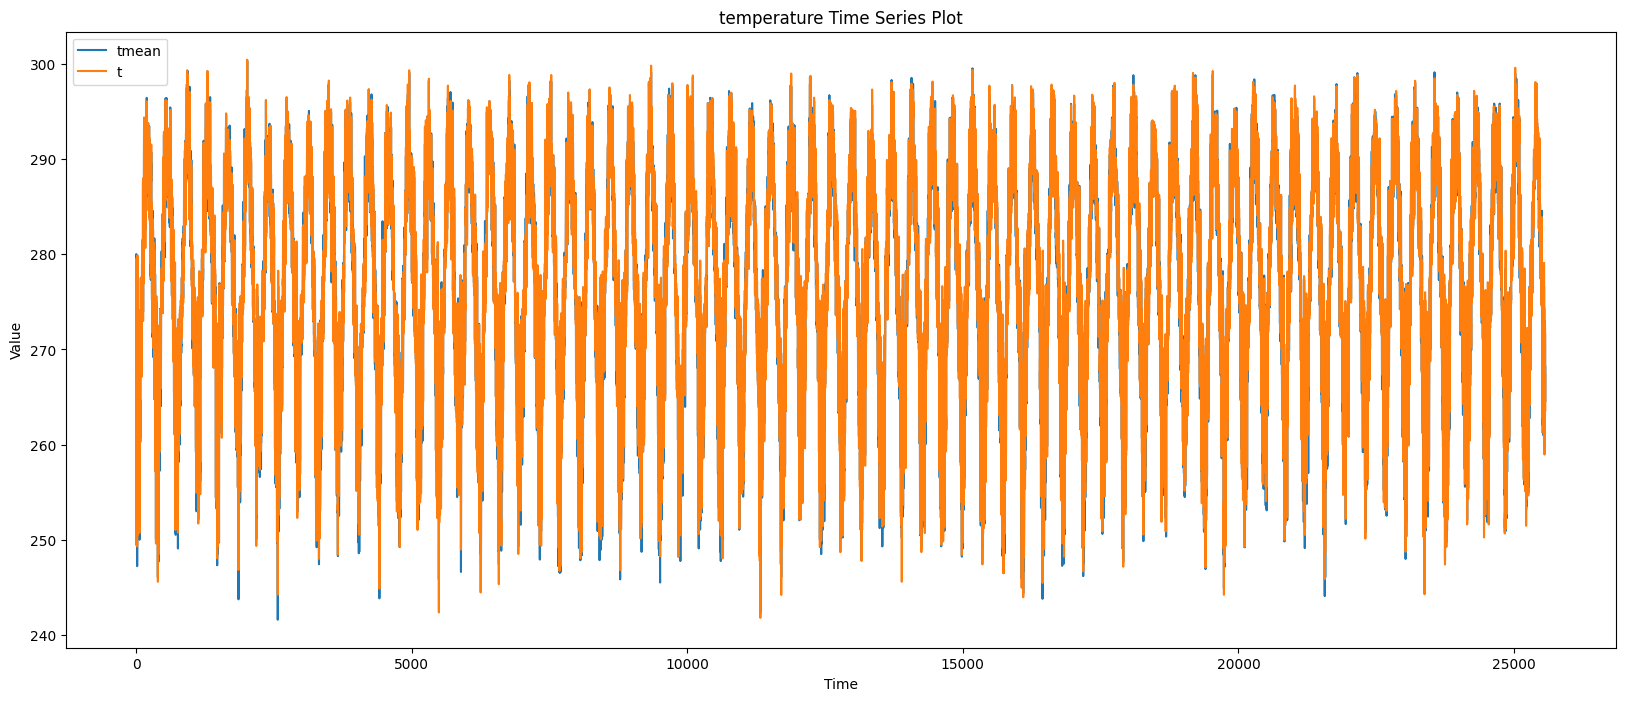

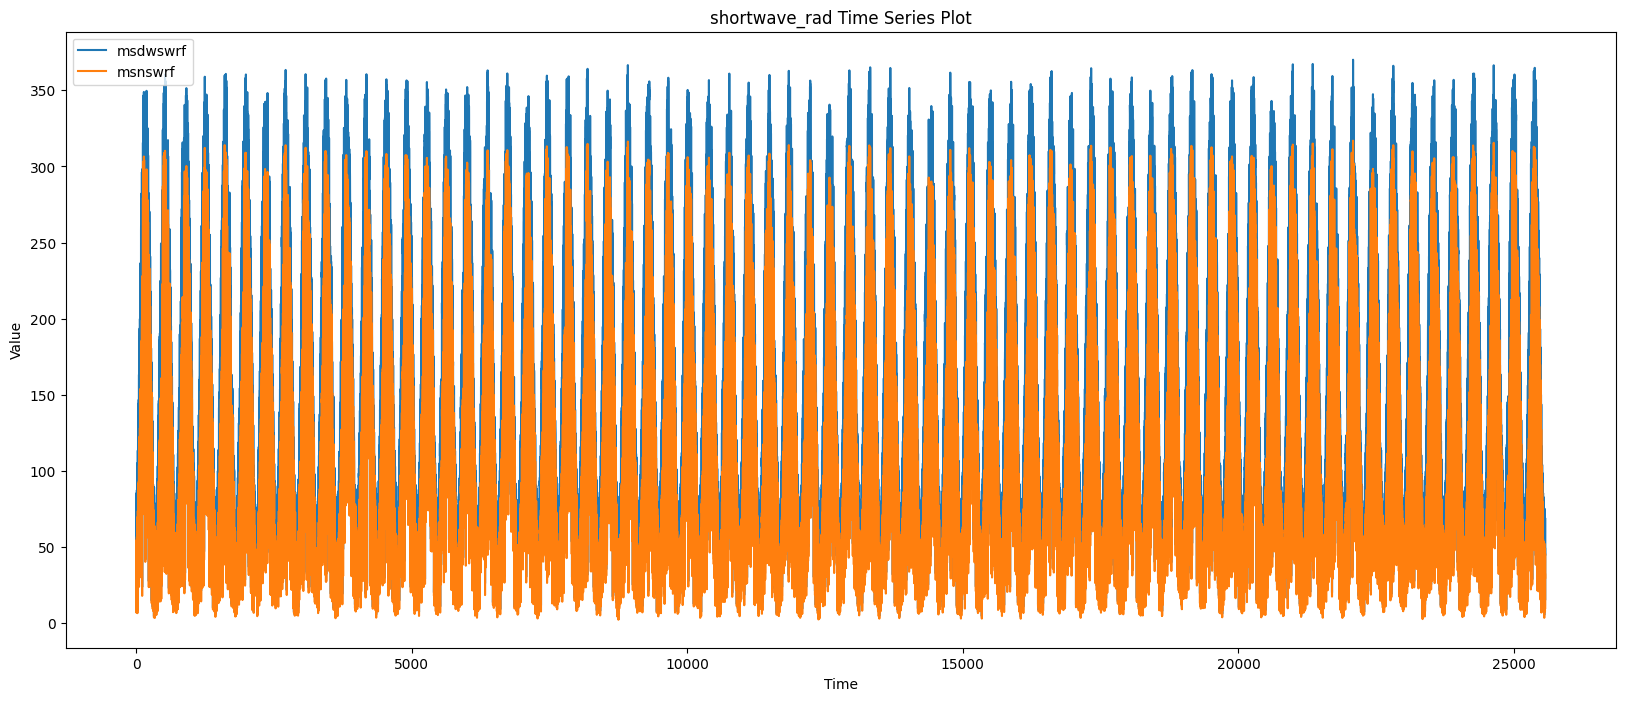

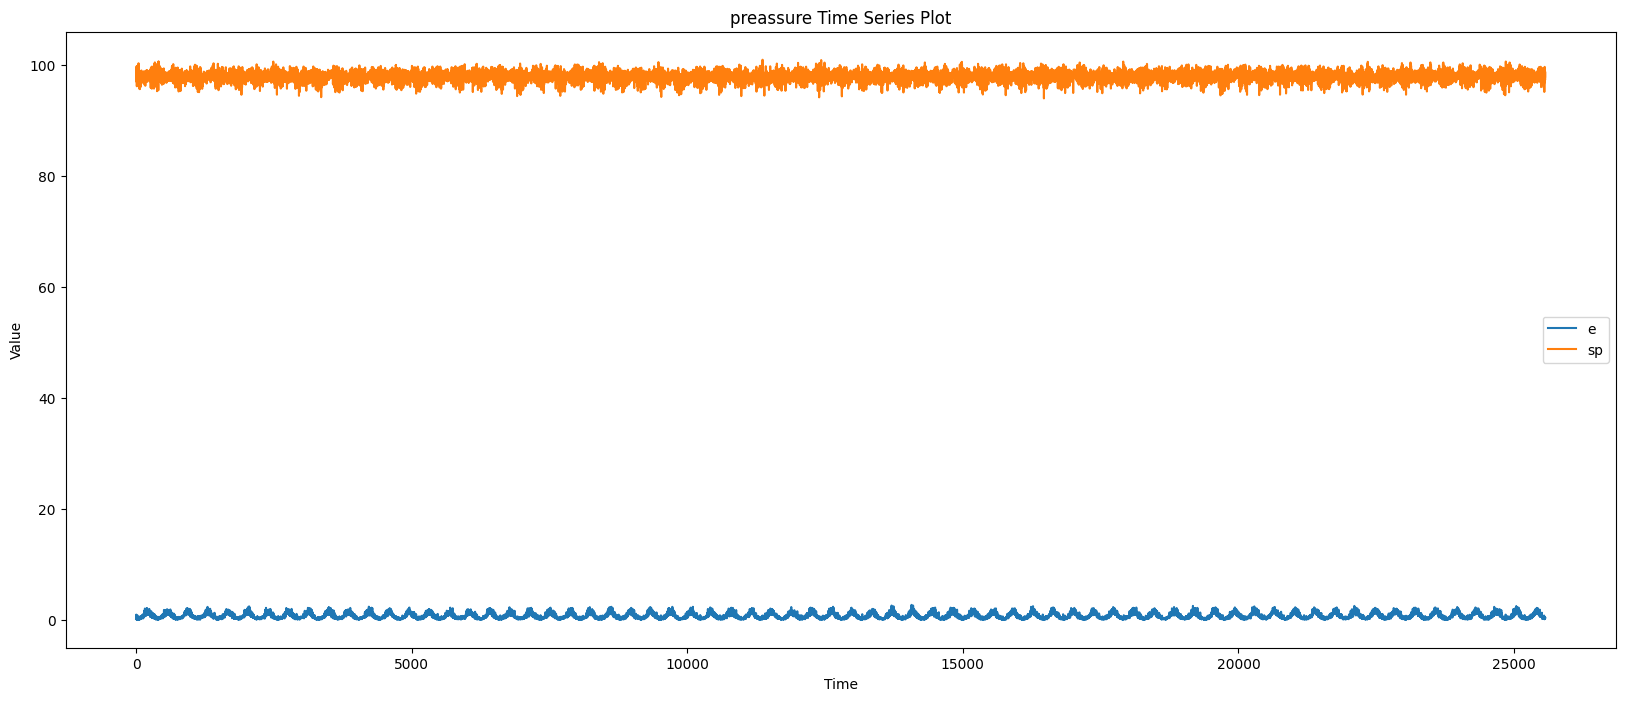

In [4]:
# Function to plot pairs
def plot_pairs(df, pairs_dict):
    for pair_name, pair_cols in pairs_dict.items():
        plt.figure(figsize=(20, 8))
        for col in pair_cols:
            plt.plot(df.index, df[col], label=col)
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title(f'{pair_name} Time Series Plot')
        # Convert string dates to datetime objects if needed
        # if isinstance(df.index[0], str):
        #     df.index = pd.to_datetime(df.index)
        # plt.xticks(df.index)
        plt.legend()
        plt.show()

# Call the function to plot pairs
plot_pairs(df, pairs_dict)
